# Jest to wersja "step by step"
# Każda linijka będzie opisana komentarzem. 

Powstała ona w celu nauki własnej i lepszego zrozumienia pisanego kodu i operacji wykonywanych na danych


# Predykcja wytrzymałości betonu na ściskanie



Wytrzymałość na ściskanie betonu jest określana zazwyczaj w przedziale od 7 do 28 dni (lub w czasie równoważnym do cementu) wg normy PN-EN 206.

Ze względu na długi czas oczekiwania na wynik a w szczególności w oczekiwaniu na korekty w składzie betonu postanowiłem opracować model uczenia maszynowego którego celem jest określenie wytrzymałości betonu na ściskanie dla różnych składników wejściowych.

Korekty w składzie mieszanki betonowej dokonuje się najczęściej w przypadku niewłaściwej konsystencji mieszanki lub osiągnięcia niewystarczającej wytrzymałości na ściskanie. Dzięki takiemu modelowi będzie można zbadać wpływ poszczególnych skladników na mieszankę betonową a w konsekwencji dobrać ilościowo surowiec w sposób jak najbardziej optymalny 

Wartości zostaną obliczone za pomocą kilku rodzajów modeli w celu wybrania najbardziej optymalnego rozwiązania i miarodajnego rozwiązania

Poniższa baza powstała w zakładzie prefabrykacji podczas zarobów próbnych i testowej produkcji betonu.

Zawiera ona informacje z naważania składników oraz wytrzymałość na ściskanie po określonej ilości dni

W celu zwiększenia ilości próbek w danych wsadowych uwzględniono również wyniki badań kostek "świadków" w wieku od 90 do 365 dni oraz zbiór danych z serwisu kaggle.com


# Importowanie niezbędnych bibliotek

W poniższym kroku zaimportowałem następijące biblioteki:

    a) Pandas - odpowiedzialną za operację na danych
    
    b) Matplotlib - bibliotekę służącą do generowania wykresów
    
    c) Seaborn - bibliotekę, niejako nakładkę na matplotlib która umożliwia rysowanie ładniejszych wykresów i ma wbudowane domyślne wykresy staytstyczne
    
    d) Numpy - biblioteka odpowiedzialna za operacje numeryczne

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


Wczytanie pliku bazy danych

W poniższym kroku wczytuję dane z pliku .csv
literka "r" przed stringiem oznacza "raw input" przez co nie ma problemów ze znakami ucieczki

In [ ]:
path = r"C:\Users\sied\Desktop\concrete_data.csv" #sciezka do bazy danych

Do zmiennej beton przypisuję obiekt "dataframe" odczytany z pliku .csv za pomocą wbudowanej metody pandasa ".read_csv(ścieżka)"

In [ ]:
beton = pd.read_csv(path)

W związku z niewielkim wykorzystaniem wielkopiecowego żużla w receptach wykorzystywanych powszechnie na terenie naszego kraju ze zbioru danych zostanie ten składnik usunięty

Za pomocą metody .drop() usuwam kolumnę z obiektu "data frame". W pierwszym argumencie podaję nazwę koilumny, w następnym wektor (1 oznacza kolumnę a 0 oznacza wiersz i nasępnie argument "inplace" który odpowiada za zastępowanie oviektu. W przypadku braku "inplace = True" należałoby stworzyć osobną zmienną.)

In [ ]:
beton.drop("żużel_wielkopiecowy [kg/m3]",1, inplace=True)

C:\Users\sied\AppData\Local\Temp/ipykernel_17492/2731498070.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  beton.drop("żużel_wielkopiecowy [kg/m3]",1, inplace=True)


Teraz przedstawimy dane wsadowe

metoda .info() przedstawia inforacje o obiekcie dataframe przyisanym wcześniej do zmiennej "beton"

In [ ]:
beton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cement [kg/m3]                   1030 non-null   float64
 1   popiół_lotny [kg/m3]             1030 non-null   float64
 2   woda [kg/m3]                     1030 non-null   float64
 3   superplastyfikator [kg/m3]       1030 non-null   float64
 4   kruszywo_grube [kg/m3]           1030 non-null   float64
 5   kruszywo_drobne [kg/m3]          1030 non-null   float64
 6   wiek [dni]                       1030 non-null   int64  
 7   wytrzymałość_na_ściskanie [MPa]  1030 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


W poniższych krokach za pomocą metody .describe() tworzę szybką statystykę moich danych a za pomocą transpozycji transponuję do wygodniejszej formy

In [ ]:
opis = beton.describe()
opis.transpose()

,count,mean,std,min,25%,50%,75%,max
cement [kg/m3],1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
popiół_lotny [kg/m3],1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
woda [kg/m3],1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastyfikator [kg/m3],1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
kruszywo_grube [kg/m3],1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
kruszywo_drobne [kg/m3],1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
wiek [dni],1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
wytrzymałość_na_ściskanie [MPa],1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Dane nie zawierają wartości pustych. Baza danych jest spójna.
Dodatkowo możemy wywnioskować wzrost wytrzymałości na ściskanie wraz ze wzrostem czasu dojrzewania betonu
Przejdźmy teraz do opracowania wykresów gęstości naszych danych
    

W celu narysowania wykresu gęstości (sns.distplot) tworzę pętlę po wszystkich kolumnach obiektu dataframe (czyli naszej zmiennej beton)

Dla każdej kolumny narysuj wykres gęstości oraz go pokaż.

C:\Users\sied\Desktop\python\WPy64-3980\python-3.9.8.amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


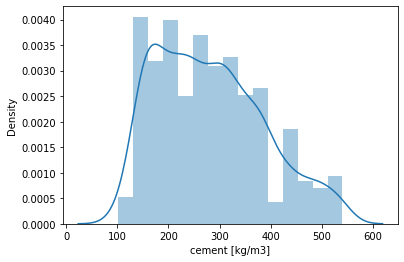

C:\Users\sied\Desktop\python\WPy64-3980\python-3.9.8.amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


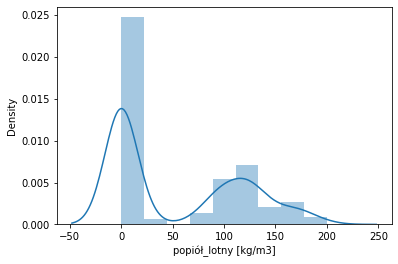

C:\Users\sied\Desktop\python\WPy64-3980\python-3.9.8.amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


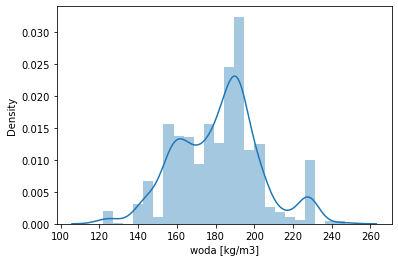

C:\Users\sied\Desktop\python\WPy64-3980\python-3.9.8.amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


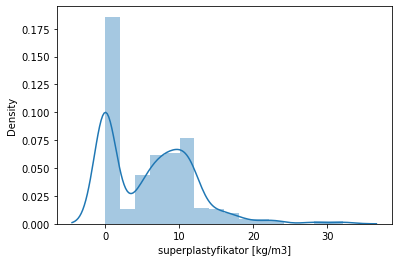

C:\Users\sied\Desktop\python\WPy64-3980\python-3.9.8.amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


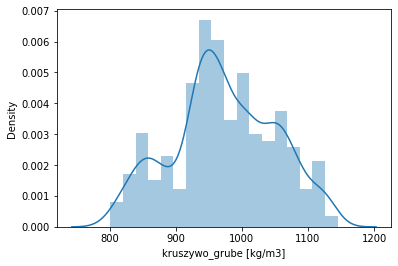

C:\Users\sied\Desktop\python\WPy64-3980\python-3.9.8.amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


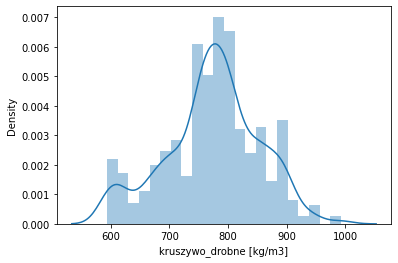

C:\Users\sied\Desktop\python\WPy64-3980\python-3.9.8.amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


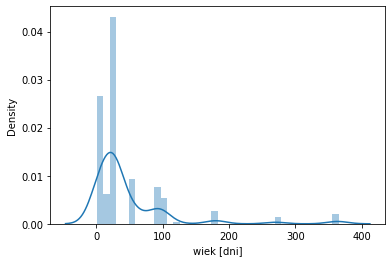

C:\Users\sied\Desktop\python\WPy64-3980\python-3.9.8.amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


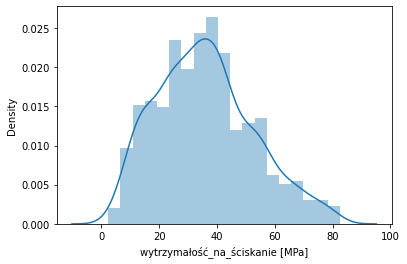

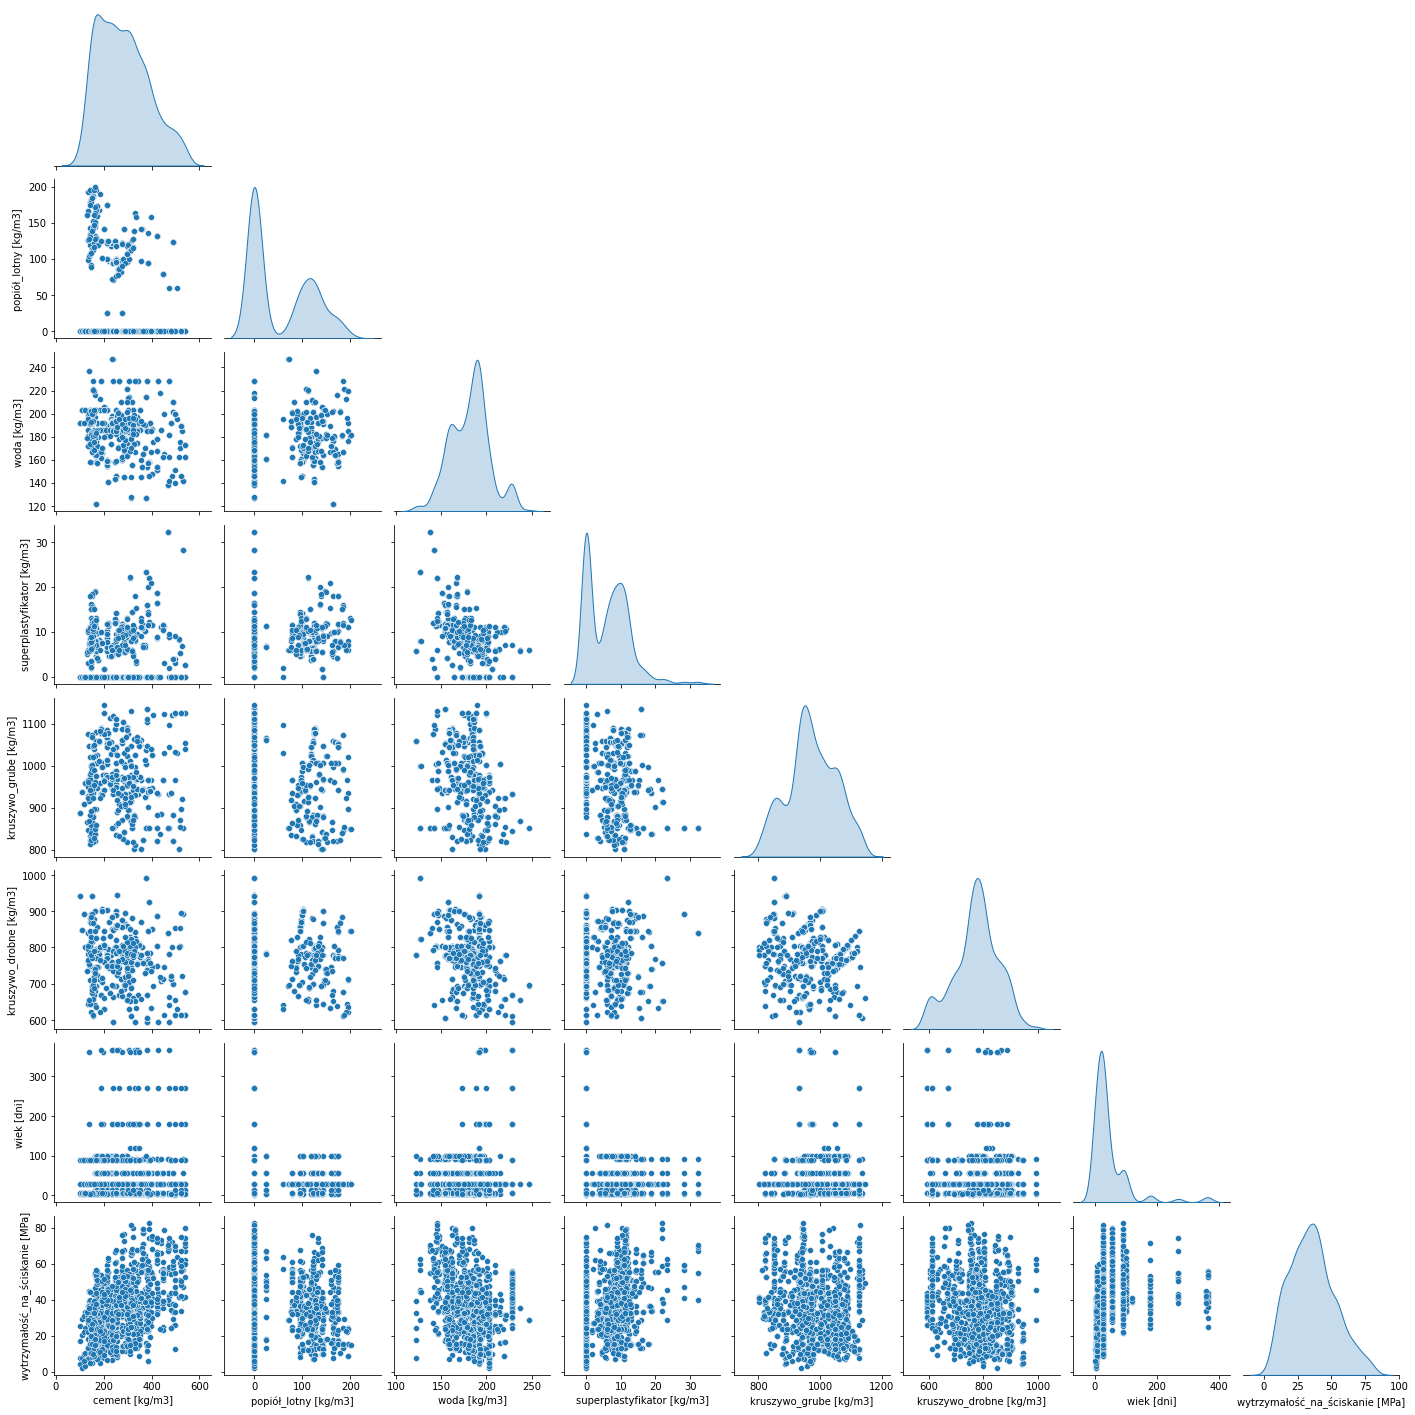

In [ ]:
for i in beton.columns:
    sns.distplot(beton[i])
    plt.show()
    
sns.pairplot(beton, diag_kind = "kde", corner=True)



# Wartości odstające

Wartości odstające, których nie daje się wyjaśnić, są zwane wartościami odstającymi. Obserwacje te są niespójne z pozostałymi danymi szeregu i mogą drastycznie wpłynąć na analizę, a w efekcie pogorszyć możliwości prognozowania modelu.

Wartości takie występują powszechnie w szczególności podczas analizy wyników wytrzymałości betonu na rozciąganie przy rozłupywaniu.


Tutaj trochę będzie pisania :)

Definicje:

Kwamtyl - Wartość cechy, która dzieli uporządkowaną zbiorowość statystyczną na dwie części w taki sposób, że 25% jednostek zbiorowości ma wartości cechy mniejsze lub równe wartości kwartyla pierwszego, a 75% jednostek badanej zbiorowości ma wartości cechy większe lub równe wartości kwartyla pierwszego.
Źródło: https://stat.gov.pl/metainformacje/slownik-pojec/pojecia-stosowane-w-statystyce-publicznej/2896,pojecie.html

df.iloc[:] - indeksator oparty na lokalizacji etykiety kolumn. Np beton.iloc[0:3] zwróci nam 3 pierwsze wpisy. df.iloc[:] zwraca nam wszystkie wartości czyli niejako całą tabelę
    
Ogólnie więc w celu policzenia roztępu międzykwantylowego czyli różnicy pomiędzy trzecim kwartylem i pierwszym kwartylem badanej cechy (ponieważ pomiędzy tymi kwartylami znajduje się 50% wszystkich obserwacji, dlatego im większa szerokość rozstępu ćwiartkowego, tym większe zróżnicowanie (miary zróżnicowania) badanej cechy statystycznej w próbie.) należy najpoerw obliczyć pierwszy kwantyl (q1) oraz trzeci kwantyl (q3)

Następnie odejmujemy wartość pierwszego kwantylu (q1) od trzeciego kwantylu (q3)

    


In [ ]:
q1=beton.quantile(0.25) #Pierwszy kwantyl
q3=beton.quantile(0.75) #Trzeci kwantyl
IQR=q3-q1 #Rozstęp międzykwanylowy

print("Pierwszy kwantyl\n----")
print(q1)
print("\nTrzeci kwantyl\n----")
print(q3)
print("\nRozstęp ćwiartkowy\n----")
print(IQR)

Pierwszy kwantyl
----
cement [kg/m3]                     192.375
popiół_lotny [kg/m3]                 0.000
woda [kg/m3]                       164.900
superplastyfikator [kg/m3]           0.000
kruszywo_grube [kg/m3]             932.000
kruszywo_drobne [kg/m3]            730.950
wiek [dni]                           7.000
wytrzymałość_na_ściskanie [MPa]     23.710
Name: 0.25, dtype: float64

Trzeci kwantyl
----
cement [kg/m3]                      350.000
popiół_lotny [kg/m3]                118.300
woda [kg/m3]                        192.000
superplastyfikator [kg/m3]           10.200
kruszywo_grube [kg/m3]             1029.400
kruszywo_drobne [kg/m3]             824.000
wiek [dni]                           56.000
wytrzymałość_na_ściskanie [MPa]      46.135
Name: 0.75, dtype: float64

Rozstęp ćwiartkowy
----
cement [kg/m3]                     157.625
popiół_lotny [kg/m3]               118.300
woda [kg/m3]                        27.100
superplastyfikator [kg/m3]          10.200
kruszywo_g

In [ ]:
cwo=((beton.iloc[:] <(q1-1.5*IQR)) | (beton.iloc[:]>(q3+1.5*IQR))).sum(axis=0) # '|' - Operator bitowy

print("\nLiczba kolumn z outlinerami\n----")
print(cwo)


Liczba kolumn z outlinerami
----
cement [kg/m3]                      0
popiół_lotny [kg/m3]                0
woda [kg/m3]                        9
superplastyfikator [kg/m3]         10
kruszywo_grube [kg/m3]              0
kruszywo_drobne [kg/m3]             5
wiek [dni]                         59
wytrzymałość_na_ściskanie [MPa]     4
dtype: int64


Tworzenie obiektu dataframe do dalszych operacji poprzez stworzenie nowego obiektu dataframe opdf i dodanie nowej kolumny z wartością procentową

In [ ]:
opdf=pd.DataFrame(cwo,index=beton.columns,columns=["Liczba wartości odstających"])
opdf["Procentowa zawartość wartości odstających w danej kolumnie"]=round(opdf["Liczba wartości odstających"]*100/len(beton),2)


In [ ]:
opdf

,Liczba wartości odstających,Procentowa zawartość wartości odstających w danej kolumnie
cement [kg/m3],0,0.00
popiół_lotny [kg/m3],0,0.00
woda [kg/m3],9,0.87
superplastyfikator [kg/m3],10,0.97
kruszywo_grube [kg/m3],0,0.00
kruszywo_drobne [kg/m3],5,0.49
wiek [dni],59,5.73
wytrzymałość_na_ściskanie [MPa],4,0.39


W tym kroku robimy funkcję która zwraca nam 1 jeżeli dana wartość jest w poza kwantylem a 0 jeżeli się mieści w przedziale

In [ ]:
rwo=(((beton[:]<(q1-1.5*IQR))|(beton[:]>(q3+1.5*IQR))).sum(axis=1))
rwo

0       1
1       0
2       1
3       1
4       1
       ..
1025    0
1026    0
1027    0
1028    0
1029    0
Length: 1030, dtype: int64

Teraz wyprintujemy ilość wartości odstających

In [ ]:
print(rwo.sum())

87


Teraz liczymi jaki procent jest w danych wierszach odstających wartości. 

In [ ]:
ro005=(((rwo/len(beton.columns))<0.05).sum())*100/len(beton)
ro01=(((rwo/len(beton.columns))<0.1).sum())*100/len(beton)
ro015=(((rwo/len(beton.columns))<0.15).sum())*100/len(beton)
ro02=(((rwo/len(beton.columns))<0.2).sum())*100/len(beton)
ro025=(((rwo/len(beton.columns))<0.25).sum())*100/len(beton)
ro03=(((rwo/len(beton.columns))<0.30).sum())*100/len(beton)
ro035=(((rwo/len(beton.columns))<=0.35).sum())*100/len(beton)
ro04=(((rwo/len(beton.columns))<=0.4).sum())*100/len(beton)
ro045=(((rwo/len(beton.columns))<=0.45).sum())*100/len(beton)
ro05=(((rwo/len(beton.columns))<=0.50).sum())*100/len(beton)
ro055=(((rwo/len(beton.columns))<0.55).sum())*100/len(beton)
ro06=(((rwo/len(beton.columns))<0.6+0).sum())*100/len(beton)
ro=pd.DataFrame(np.round([ro005,ro01,ro015,ro02,ro025,ro03,ro035,ro04,ro045,ro05,ro055,ro06],2),
             index=['5%','10%','15%','20%','25%','30%','35%','40%','45%','50%','55%','60%'],
            columns=['% Data'])
ro.index.name='% Wartości odstających w danym wierszu'

ro

,% Data
% Wartości odstających w danym wierszu,
5%,91.55
10%,91.55
15%,100.00
20%,100.00
25%,100.00
30%,100.00
35%,100.00
40%,100.00
45%,100.00


W każdym wierszu nie występuje więcej niż 10% wartości odstających. W związku z tym nieliczne wartości odstające zostaną potraktowane przy użyciu metody MICE (Multiple Imputation using Chained Equations) po przekształceniu tych wartości odstających na wartości NaN.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
imp = IterativeImputer()
imp.fit(beton)
beton=pd.DataFrame(imp.transform(beton),columns=beton.columns)

Można więc zauważyć, że wszystkie wartości odstające zostały usunięte poprzez przekształcenie ich na wartości NaN i imputację przy użyciu MICE.

In [ ]:
beton.isnull().sum()

cement [kg/m3]                     0
popiół_lotny [kg/m3]               0
woda [kg/m3]                       0
superplastyfikator [kg/m3]         0
kruszywo_grube [kg/m3]             0
kruszywo_drobne [kg/m3]            0
wiek [dni]                         0
wytrzymałość_na_ściskanie [MPa]    0
dtype: int64

In [ ]:
g=beton.groupby("wiek [dni]")
g1=g.get_group(1)
g3=g.get_group(3)
g7=g.get_group(7)
g14=g.get_group(14)
g28=g.get_group(28)
pd.DataFrame(round(g28.iloc[:,-1].sort_values()).unique(),columns=["wytrzymałość_na_ściskanie [MPa]"])

,wytrzymałość_na_ściskanie [MPa]
0,9.0
1,10.0
2,11.0
3,12.0
4,13.0
...,...
62,75.0
63,76.0
64,79.0
65,80.0


In [ ]:
beton.corr()

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni],wytrzymałość_na_ściskanie [MPa]
cement [kg/m3],1.000000,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
popiół_lotny [kg/m3],-0.397467,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
woda [kg/m3],-0.081587,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastyfikator [kg/m3],0.092386,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
kruszywo_grube [kg/m3],-0.109349,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
kruszywo_drobne [kg/m3],-0.222718,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
wiek [dni],0.081946,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
wytrzymałość_na_ściskanie [MPa],0.497832,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


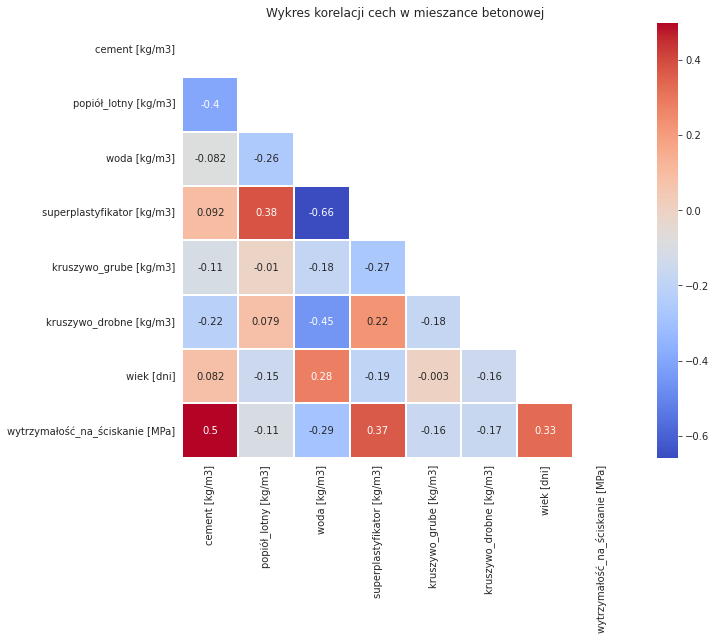

In [ ]:
cp = beton.corr()
mask = np.zeros_like(cp)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
with sns.axes_style("white"):
    sns.heatmap(cp,annot=True,linewidth=2,mask = mask,cmap="coolwarm")
plt.title("Wykres korelacji cech w mieszance betonowej")
plt.show()

Z powyższego wykresu możemy wywnioskować dodatnią korelację pomiędzy wytrzymałością na ściskanie a zawartością cementu, superplastyfikatora.

Dodatkowo możemy zaobserować spadek ilości wody przy zastosowaniu superplastyfikatora co potwierdza prawidłowość naszych danych.

Nie mniej jednak żadna z cech nie jest silnie skorelowana ani skorelowana ze zmienną docelową (0,7<|r|≤0,9)


# Regresja liniowa

In [ ]:
import statsmodels.api as sm
col = int(len(beton.columns))
col -= 1


In [ ]:
X=beton.iloc[:,:col] #Zwracam zakres kolumn w obiekcie DataFrame czyli od 1 kolumny do 7 (Do wieku. Ostatnią przewiduję)
X

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
0,540.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,0.0,228.0,0.0,932.0,594.0,270.0
3,332.5,0.0,228.0,0.0,932.0,594.0,365.0
4,198.6,0.0,192.0,0.0,978.4,825.5,360.0
...,...,...,...,...,...,...,...
1025,276.4,90.3,179.6,8.9,870.1,768.3,28.0
1026,322.2,115.6,196.0,10.4,817.9,813.4,28.0
1027,148.5,108.6,192.7,6.1,892.4,780.0,28.0
1028,159.1,0.0,175.6,11.3,989.6,788.9,28.0


In [ ]:
Y=beton.iloc[:,col] #Zwracam jedną kolumne (1 wymiar) dla danych które chcę przewidywać czyli ostatnią kolumnę
Y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: wytrzymałość_na_ściskanie [MPa], Length: 1030, dtype: float64

In [ ]:
ls=sm.OLS(Y,sm.add_constant(X))
wynik=ls.fit()
wynik.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     wytrzymałość_na_ściskanie [MPa]   R-squared:                       0.576
Model:                                         OLS   Adj. R-squared:                  0.573
Method:                              Least Squares   F-statistic:                     198.3
Date:                             Thu, 17 Mar 2022   Prob (F-statistic):          1.79e-185
Time:                                     14:27:43   Log-Likelihood:                -3919.4
No. Observations:                             1030   AIC:                             7855.
Df Residuals:                                 1022   BIC:                             7894.
Df Model:                                        7                                         
Covariance Type:                         nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        210.4226     14.333     14.681      0.000     182.298     238.547
cement [kg/m3]                 0.0424      0.004     10.420      0.000       0.034       0.050
popiół_lotny [kg/m3]          -0.0237      0.007     -3.583      0.000      -0.037      -0.011
woda [kg/m3]                  -0.4287      0.031    -13.811      0.000      -0.490      -0.368
superplastyfikator [kg/m3]     0.2824      0.098      2.880      0.004       0.090       0.475
kruszywo_grube [kg/m3]        -0.0584      0.006     -9.774      0.000      -0.070      -0.047
kruszywo_drobne [kg/m3]       -0.0740      0.006    -12.864      0.000      -0.085      -0.063
wiek [dni]                     0.1080      0.006     19.080      0.000       0.097       0.119
==============================================================================
Omnibus:                        0.940   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.971
Skew:                          -0.073   Prob(JB):                        0.615
Kurtosis:                       2.962   Cond. No.                     5.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Uwagi:

[1] Błędy standardowe zakładają, że macierz kowariancji błędów jest poprawnie określona.

[2] Liczba warunkowa jest duża - 5,44e+04. Może to oznaczać, że występuje śilna wieloliniowość lub inne problemy numeryczne.

Widzimy, że składnik stały ma wartość P większą od 0,05, czyli od założonego poziomu istotności, dlatego usuwamy składnik stały z modelowania.


In [ ]:
ls=sm.OLS(Y,X)
wynik=ls.fit()
wynik.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     wytrzymałość_na_ściskanie [MPa]   R-squared (uncentered):                   0.908
Model:                                         OLS   Adj. R-squared (uncentered):              0.908
Method:                              Least Squares   F-statistic:                              1448.
Date:                             Thu, 17 Mar 2022   Prob (F-statistic):                        0.00
Time:                                     14:27:43   Log-Likelihood:                         -4017.9
No. Observations:                             1030   AIC:                                      8050.
Df Residuals:                                 1023   BIC:                                      8084.
Df Model:                                        7                                                  
Covariance Type:                         nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
cement [kg/m3]                 0.0686      0.004     17.026      0.000       0.061       0.076
popiół_lotny [kg/m3]          -0.0096      0.007     -1.330      0.184      -0.024       0.005
woda [kg/m3]                  -0.0240      0.016     -1.530      0.126      -0.055       0.007
superplastyfikator [kg/m3]     1.1976      0.083     14.384      0.000       1.034       1.361
kruszywo_grube [kg/m3]         0.0157      0.004      4.475      0.000       0.009       0.023
kruszywo_drobne [kg/m3]       -0.0078      0.004     -1.981      0.048      -0.015   -7.16e-05
wiek [dni]                     0.1001      0.006     16.155      0.000       0.088       0.112
==============================================================================
Omnibus:                        6.692   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.775
Skew:                           0.197   Prob(JB):                       0.0338
Kurtosis:                       2.953   Cond. No.                         288.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Uwagi:

[1] R² oblicza się bez wypośrodkowania (niewypośrodkowane), ponieważ model nie zawiera stałej.

[2] Błędy standardowe zakładają, że macierz kowariancji błędów jest prawidłowo określona.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, Y, random_state=150, test_size=0.3 )


In [ ]:
X_train

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
1012,325.6,0.0,174.0,8.9,881.6,790.0,28.0
276,251.4,118.3,188.5,5.8,1028.4,757.7,28.0
236,213.8,24.5,181.7,6.7,1066.0,785.5,28.0
537,480.0,0.0,192.0,0.0,936.2,712.2,28.0
494,387.0,94.0,157.0,14.3,938.0,845.0,56.0
...,...,...,...,...,...,...,...
764,385.0,0.0,186.0,0.0,966.0,763.0,3.0
306,277.1,97.4,160.6,11.8,973.9,875.6,28.0
496,387.0,94.0,157.0,11.6,938.0,845.0,56.0
25,380.0,0.0,228.0,0.0,932.0,670.0,270.0


In [ ]:
X_test

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
926,162.0,164.0,202.0,10.0,820.0,680.0,28.0
58,304.0,0.0,228.0,0.0,932.0,670.0,180.0
225,168.0,163.8,121.8,5.7,1058.7,780.1,14.0
381,315.0,0.0,145.0,5.9,1130.0,745.0,28.0
461,167.4,128.6,175.5,7.8,1006.3,746.6,100.0
...,...,...,...,...,...,...,...
224,168.0,163.8,121.8,5.7,1058.7,780.1,3.0
513,424.0,132.0,168.0,8.9,822.0,750.0,7.0
162,374.0,0.0,170.1,10.1,926.1,756.7,91.0
462,172.4,172.4,156.8,4.1,1006.3,856.4,100.0


In [ ]:
y_train

1012    61.24
276     29.65
236     40.23
537     43.94
494     56.34
        ...  
764     14.70
306     48.28
496     61.46
25      53.30
442     44.64
Name: wytrzymałość_na_ściskanie [MPa], Length: 721, dtype: float64

In [ ]:
y_test

926    30.65
58     50.95
225    17.82
381    81.75
461    53.66
       ...  
224     7.75
513    40.29
162    64.90
462    37.68
874    36.80
Name: wytrzymałość_na_ściskanie [MPa], Length: 309, dtype: float64

In [ ]:
lr=LinearRegression()

lr.fit(X_train,y_train)
z = lr.predict(X_train.iloc[[2],:]) #Przykład dla jakiejś tablicy.
z[0]

24.83412480245613

In [ ]:
X_train.iloc[[2],:]

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
236,213.8,24.5,181.7,6.7,1066.0,785.5,28.0


In [ ]:
X_train.iloc[0,2]/X_train.iloc[0,0] # Obliczanie stosunku wodno-cementowego informacyjnie w sumie

0.5343980343980343

In [ ]:
print('Ocena modelu: ',lr.score(X_train,y_train))
y_pred_lrtr=lr.predict(X_train)
y_pred_lrte=lr.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error

print('Ocena modelu treningowego R2 : ',r2_score(y_train,y_pred_lrtr))
print('Ocena modelu testowego R2 : ',r2_score(y_test,y_pred_lrte))

Ocena modelu:  0.5899852410240587
Ocena modelu treningowego R2 :  0.5899852410240587
Ocena modelu testowego R2 :  0.5383227795174068


In [ ]:
lr.score(X_train,y_train) == r2_score(y_train,y_pred_lrtr)

True

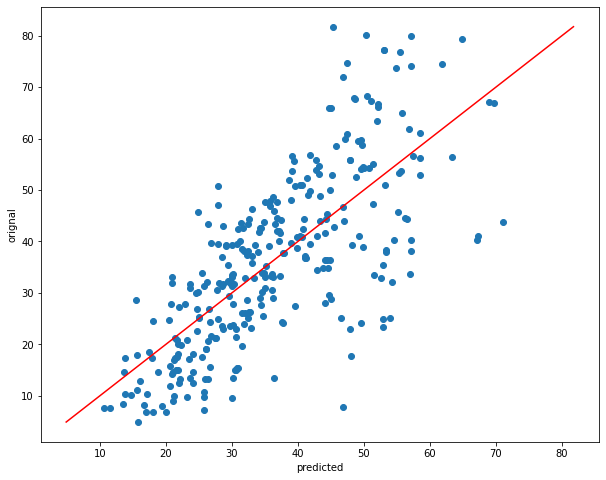

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lrte,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [ ]:
X_train.iloc[[2],:]

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
236,213.8,24.5,181.7,6.7,1066.0,785.5,28.0


In [ ]:
z = lr.predict(X_train.iloc[[2],:]) #Przykład dla jakiejś tablicy.
z[0]

24.83412480245613

In [ ]:
pf = PolynomialFeatures(degree = 2)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.7940306504653089
Test R2 - degree 2 polynomial:  0.7390345636172964


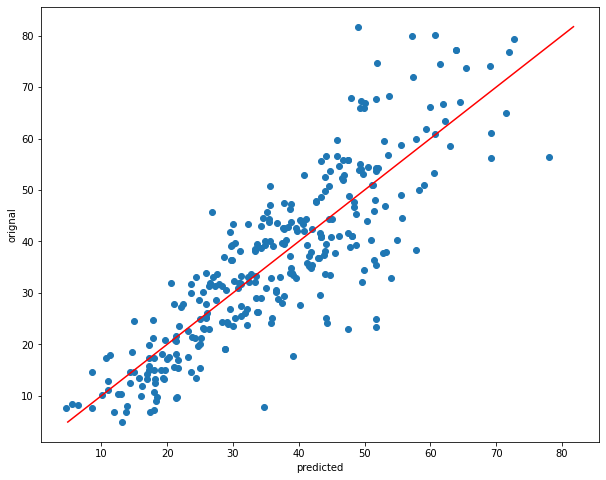

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lr2te,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [ ]:
pf = PolynomialFeatures(degree = 3)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.9069233057903048
Test R2 - degree 2 polynomial:  0.8444500091567149


In [ ]:
X_train.iloc[[2],:]

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
236,213.8,24.5,181.7,6.7,1066.0,785.5,28.0


In [ ]:
przyklad = pf.fit_transform(X_train.iloc[[2],:])
z = lr.predict(przyklad) #Przykład dla jakiejś tablicy.
z[0]


34.63644496355482

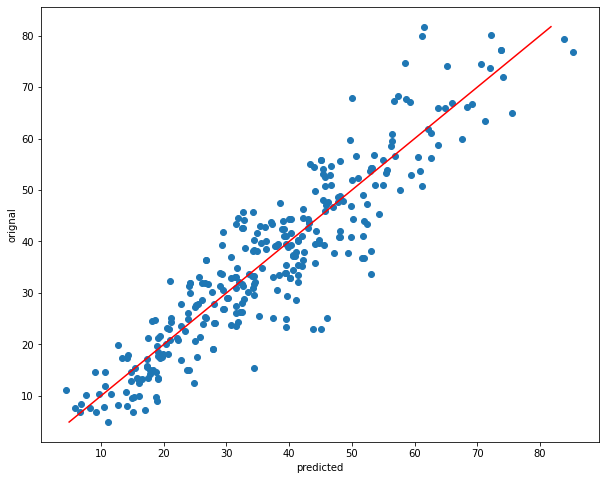

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lr2te,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [ ]:
pf = PolynomialFeatures(degree = 4)
X_polytr = pf.fit_transform(X_train)
lr.fit(X_polytr,y_train)
y_pred_lr2tr = lr.predict(X_polytr)
print("Training R2 - degree 2 polynomial: ",r2_score(y_train, y_pred_lr2tr ))
X_polyte = pf.fit_transform(X_test)
y_pred_lr2te= lr.predict(X_polyte)
print("Test R2 - degree 2 polynomial: ",r2_score(y_test,y_pred_lr2te))

Training R2 - degree 2 polynomial:  0.9706053199697631
Test R2 - degree 2 polynomial:  -3.1275237319837643


In [ ]:
X_train.iloc[[2],:]

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
236,213.8,24.5,181.7,6.7,1066.0,785.5,28.0


In [ ]:
przyklad = pf.fit_transform(X_train.iloc[[2],:])
z = lr.predict(przyklad) #Przykład dla jakiejś tablicy.
z[0]

37.61096181686298

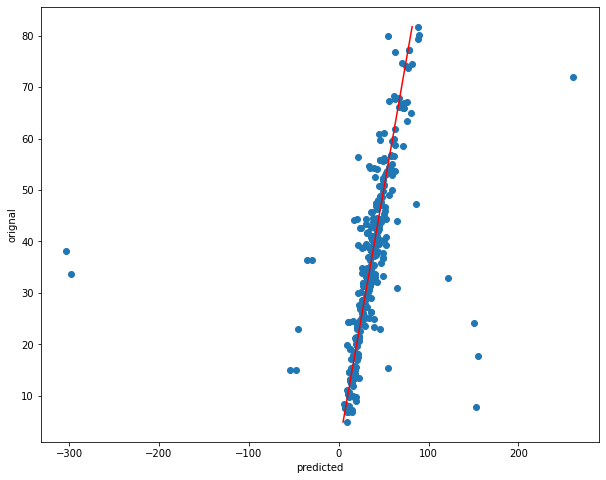

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_lr2te,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred_dttr=dt.predict(X_train)
y_pred_dtte=dt.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_dttr))
print('Test R2 score: ',r2_score(y_test,y_pred_dtte))

Train R2 score:  0.9991684139549186
Test R2 score:  0.7744053696173385


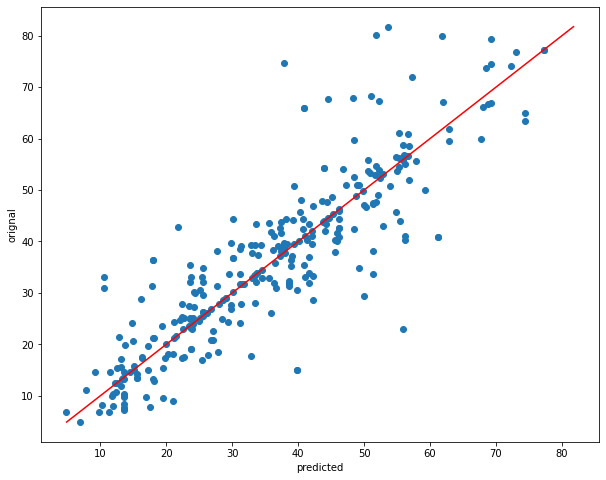

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred_dtte,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

In [ ]:
przyklad = X_test.iloc[[2],:]
walidacja = y_test.iloc[2]
z = dt.predict(przyklad) #Przykład dla jakiejś tablicy.
z[0]

32.9

In [ ]:
walidacja

17.82

In [ ]:
przyklad

,cement [kg/m3],popiół_lotny [kg/m3],woda [kg/m3],superplastyfikator [kg/m3],kruszywo_grube [kg/m3],kruszywo_drobne [kg/m3],wiek [dni]
225,168.0,163.8,121.8,5.7,1058.7,780.1,14.0


In [ ]:
beton.loc[225,:]

cement [kg/m3]                      168.00
popiół_lotny [kg/m3]                163.80
woda [kg/m3]                        121.80
superplastyfikator [kg/m3]            5.70
kruszywo_grube [kg/m3]             1058.70
kruszywo_drobne [kg/m3]             780.10
wiek [dni]                           14.00
wytrzymałość_na_ściskanie [MPa]      17.82
Name: 225, dtype: float64